In [46]:
#Retrieve address latitude and longitude from geopunt.be
#More reliable method
#https://loc.geopunt.be
#GET v2/Location?q={q}&latlon={latlon}&xy={xy}&capakey={capakey}&poi={poi}&c={c}

import requests
import json
address = "Thonetlaan 133"
req = requests.get(f"http://loc.geopunt.be/geolocation/location?q={address}&c=1",)
#for k,v in req.json()["LocationResult"][0].items():
 #   print(f"{k} : {v}")
d = req.json
print("The bounding box for your address is:",d()["LocationResult"][0]['BoundingBox'])
print("The coordinates of your address is", d()["LocationResult"][0]['Location'])

bbox = d()["LocationResult"][0]['BoundingBox']

'''
print(d()["LocationResult"][0].keys())
print(d()["LocationResult"][0]['FormattedAddress'])
print(d()["LocationResult"][0]['Location']
'''

The bounding box for your address is: {'LowerLeft': {'Lat_WGS84': 51.22903755387238, 'Lon_WGS84': 4.3934103812306065, 'X_Lambert72': 151722.05, 'Y_Lambert72': 213233.95}, 'UpperRight': {'Lat_WGS84': 51.22903755387238, 'Lon_WGS84': 4.3934103812306065, 'X_Lambert72': 151722.05, 'Y_Lambert72': 213233.95}}
The coordinates of your address is {'Lat_WGS84': 51.22903755387238, 'Lon_WGS84': 4.3934103812306065, 'X_Lambert72': 151722.05, 'Y_Lambert72': 213233.95}


'\nprint(d()["LocationResult"][0].keys())\nprint(d()["LocationResult"][0][\'FormattedAddress\'])\nprint(d()["LocationResult"][0][\'Location\']\n'

In [47]:
#Address boundary box for masking 
b = (
bbox['LowerLeft']['X_Lambert72'],
bbox['LowerLeft']['Y_Lambert72'],
bbox['UpperRight']['Y_Lambert72'],
bbox['UpperRight']['Y_Lambert72']
)

In [ ]:
#Get DSM file
#http://www.geopunt.be/download?container=dhm-vlaanderen-ii-dsm-raster-1m&title=Digitaal%20Hoogtemodel%20Vlaanderen%20II,%20DSM,%20raster,%201m
#Get DTM file
#http://www.geopunt.be/download?container=dhm-vlaanderen-ii-dtm-raster-1m&title=Digitaal%20Hoogtemodel%20Vlaanderen%20II,%20DTM,%20raster,%201m

#Try using geopunt webservice to retrieve DSM and DTM files

In [ ]:
#load shape file with Geopandas


#Also possible to subset shape file to reduce memory requirements



/home/becode/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: '-' operator will be deprecated. Use the 'difference' method instead.


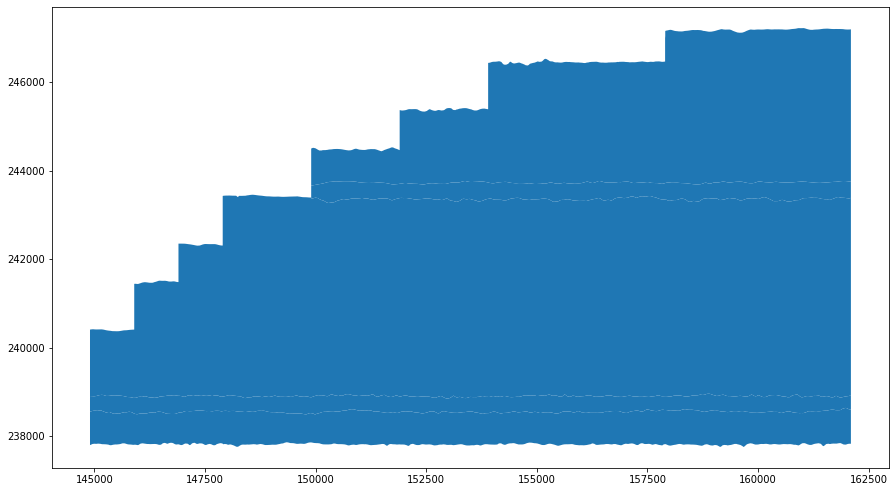

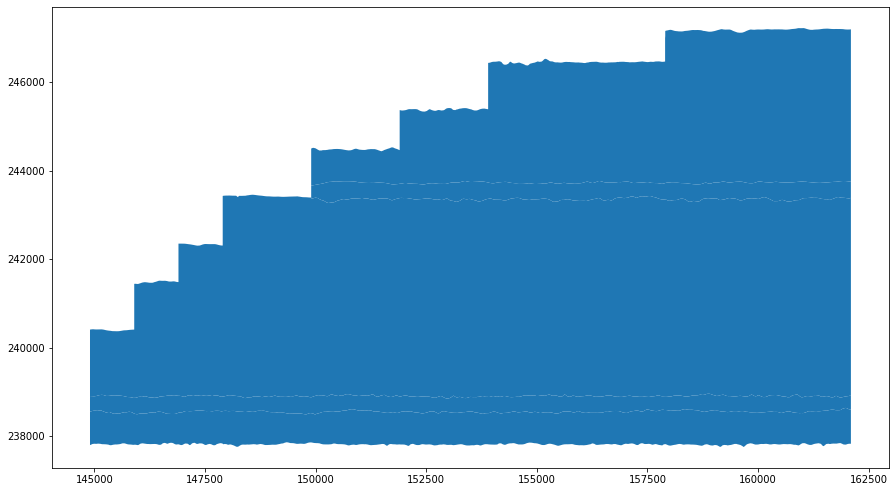

In [9]:
#opening and ploting DSM and DTM shape data
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

dsm_shp = "/home/becode/dr-robin/theano/3D_houses data/DSM/DHMVII_vdc_k01.shp"
dtm_shp = "/home/becode/dr-robin/theano/3D_houses data/DTM/DHMVII_vdc_k01.shp"

dsm_map = gpd.read_file(dsm_shp)
fig, ax = plt.subplots(figsize = (15,15))
dsm_map.plot(ax=ax)

dtm_map = gpd.read_file(dtm_shp)
fig, ax = plt.subplots(figsize = (15,15))
dtm_map.plot(ax=ax)

dhm_map = dsm_map - dtm_map

In [28]:
dir(dsm_map)

['Id',
 'OpnDatum1',
 'OpnDatum2',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd_

In [55]:
dsm_map.area
dsm_map.bounds
dsm_map.columns
#dsm_map.contains
#dsm_map.clip
dsm_map.diff()

Id           3
OpnDatum1    3
OpnDatum2    1
geometry     3
dtype: int64

In [6]:
#Opening a geotiff file

import os
import rasterio as rio
import earthpy as et

geotifffile = '/home/becode/dr-robin/theano/3D_houses data/DSM/DHMVIIDSMRAS1m_k01.tif'
#open geotiff file
with rio.open(geotifffile) as lidar_dsm:
    lidar_dsm.bounds

In [140]:
import rasterio as rio

geotifffile_dsm = '/home/becode/dr-robin/theano/3D_houses data/DSM/DHMVIIDSMRAS1m_k01.tif'
geotifffile_dtm = '/home/becode/dr-robin/theano/3D_houses data/DTM/DHMVIIDTMRAS1m_k01.tif'

geo_dsm = rio.open(geotifffile_dsm)
geo_dtm = rio.open(geotifffile_dtm)

# View generate metadata associated with the raster file
print(geo_dsm.meta)

# What is the spatial resolution?
print(geo_dsm.res)

# View image structure
print(geo_dsm.tags(ns='IMAGE_STRUCTURE'))
geo_dsm_mask = lidar_dsm.dataset_mask()

#View data mask =0 are nodata values whereas = 255 are usable data values.
print(geo_dsm_mask)

print(geo_dsm.crs)

print(geo_dsm.bounds)

#Check is dsm and dtm file have the same spatial extent
geo_dsm.bounds == geo_dtm.bounds

#Check if dsm and dtm file have the same resolution
geo_dsm.res == geo_dtm.res

#Access extra meta data by converting EPSG to proj4 code
geo_dsm.crs.data

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 17000, 'height': 9000, 'count': 1, 'crs': CRS.from_epsg(31370), 'transform': Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)}
(1.0, 1.0)
{'COMPRESSION': 'DEFLATE', 'INTERLEAVE': 'BAND'}
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
EPSG:31370
BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)


{'init': 'epsg:31370'}

In [7]:
import rasterio as rio 
from rasterio import plot

geotifffile_dsm = '/home/becode/dr-robin/theano/3D_houses data/DSM/DHMVIIDSMRAS1m_k01.tif'
geotifffile_dtm = '/home/becode/dr-robin/theano/3D_houses data/DTM/DHMVIIDTMRAS1m_k01.tif'

#subtract DTM from DSM to get DHM geotiff
with rio.open(geotifffile_dtm) as src:
    lidar_dem_im = src.read(1, masked=True)
    sjer_ext = rio.plot.plotting_extent(src)
    
with rio.open(geotifffile_dsm) as src:
    lidar_dsm_im = src.read(1, masked=True)
    dsm_meta = src.profile

## Calculate DHM/CHM model 

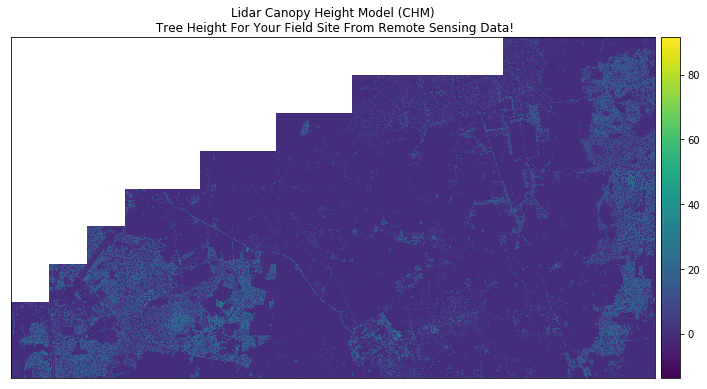

In [57]:
# calculate canopy height model
import earthpy.plot as ep
import matplotlib.pyplot as plt

lidar_chm = lidar_dsm_im - lidar_dem_im

ep.plot_bands(lidar_chm,
              cmap='viridis',
              title="Lidar Canopy Height Model (CHM)\n Tree Height For Your Field Site From Remote Sensing Data!")
plt.show()


In [73]:
dir(lidar_chm)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__'

In [83]:
lidar_chm.mask

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

## Mask DHM using address boundary box
# Actually could mask DSM and DTM before calculating DHM

In [ ]:
https://automating-gis-processes.github.io/CSC18/lessons/L6/clipping-raster.html
import rasterio

from rasterio.plot import show

from rasterio.plot import show_hist

from rasterio.mask import mask

from shapely.geometry import box

import geopandas as gpd

from fiona.crs import from_epsg

import pycrs

## Plotting DSM and DTM geotiff 

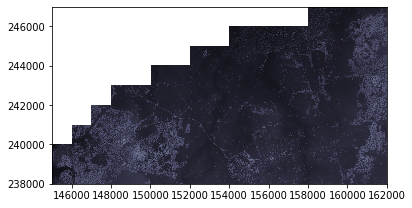

In [15]:
import rasterio as rio
from rasterio import plot

dsm = rio.open('/home/becode/dr-robin/theano/3D_houses data/DSM/DHMVIIDSMRAS1m_k01.tif')
dtm = rio.open('/home/becode/dr-robin/theano/3D_houses data/DTM/DHMVIIDTMRAS1m_k01.tif')

rio.plot.show(dsm, cmap='bone')

In [59]:
dsm.name
dsm.mode
dsm.closed
array = dsm.read(1)

#print(array.shape)

#from matplotlib import pyplot
#pyplot.imshow(array, cmap='pink')

#pyplot.show()  

NameError: name 'dsm' is not defined

In [7]:
#dir(rasterio)

In [8]:
dataset.width
dataset.height
#Every pixel in tif file is contained within a spatial bounding box (in metres) that is mapped to a region on the earth's surface
dataset.bounds
#geospatial transform that maps pixel locations (row, col coordinates) to spatial position (x, y)
dataset.transform
#gets the top left corner
dataset.transform * (0,0)

#get the bottom right corner
dataset.transform * (dataset.width, dataset.height)

#coordinate values are relative to the origin of the dataset's coordinate reference system (CRS)
dataset.crs

#access raster band by band's index number
dataset.indexes
band1 = dataset.read(1)



In [11]:
#access values inarray by row and column index
band1[dataset.height // 2, dataset.width // 2]

array([[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,  1.279e+01,
         1.280e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,  1.281e+01,
         1.284e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,  1.283e+01,
         1.288e+01],
       ...,
       [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,  1.693e+01,
         1.690e+01],
       [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,  1.691e+01,
         1.693e+01],
       [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.686e+01,  1.688e+01,
         1.690e+01]], dtype=float32)

In [17]:
#get array indices for points in the georeferenced space using index
#for example get the value for the pixel 100km east and 50km south
x, y = (dataset.bounds.left + 1000, dataset.bounds.top - 1000)
row, col = dataset.index(x, y)

print(band1[row, col])

-9999.0


In [18]:
#get the spatial coordinates of a pixel
#coordinates of center of the image
dataset.xy(dataset.height // 2, dataset.width // 2)

(153500.5, 242499.5)

In [9]:
from shapely.geometry import Polygon
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]).minimum_clearance

AttributeError: 'Polygon' object has no attribute 'minimum_clearance'

In [ ]:
#Potential to convert Geotiffs to Cloud Optimized Geotiffs
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np

# Specify the path for Landsat TIF on AWS
fp = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'

# See the profile
with rio.open(fp) as src:
    print(src.profile)
    

In [10]:
#Promising tool for visualisation LIDAR point clouds
import numpy 
import pptk 
P = numpy.random.rand(100, 3) 
v = pptk.viewer(P) 
v.set(point_size=0.01)

KeyboardInterrupt: 